<a href="https://www.kaggle.com/code/shubhamgupta012/outlier-detection-and-removal-using-z-score-iqr?scriptVersionId=125922469" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**<h2>Content
Contains Two columns:

CGPA : Aggregate Cgpa received
Package : Total Package (LPA)

Thank You !!
If like my work please UPVOTE </h2>**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-linear-regression-placement-data/placement.csv


<h1>Importing Dataset</h1>

In [2]:
df = pd.read_csv('/kaggle/input/simple-linear-regression-placement-data/placement.csv')

# Inspecting the Dataset

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.sample(5)

,cgpa,placement_exam_marks,placed
270,6.80,16.0,1
57,7.73,24.0,0
300,7.36,52.0,1
247,6.25,49.0,0
3,6.42,8.0,1


In [5]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# Checking the distribution of cgpa and placement_exam_marks colums 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


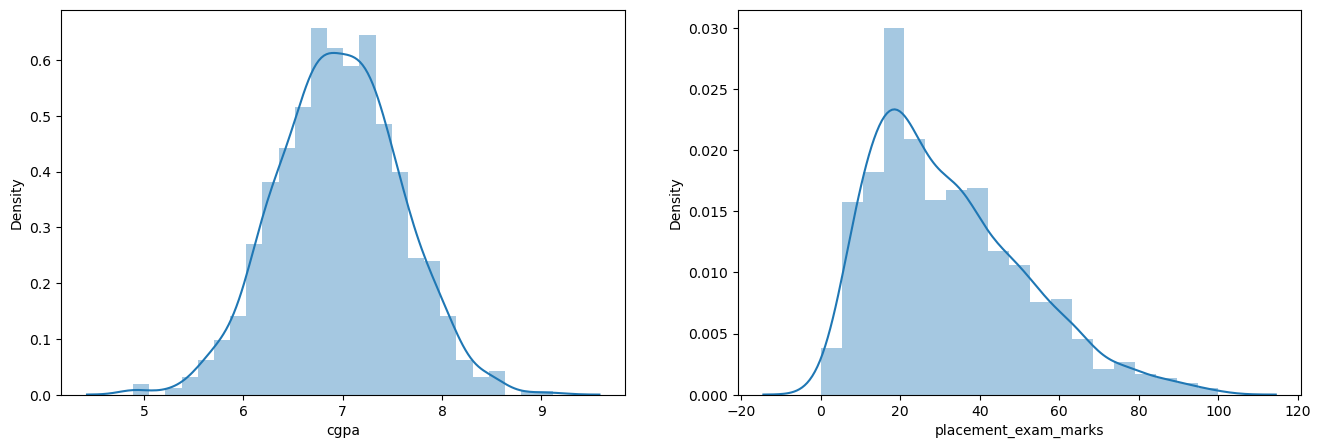

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [9]:
print("Minimum value of cgpa is",df['cgpa'].min())
print("Maximum value of cgpa is",df['cgpa'].max())
print("Mean value of cgpa is",df['cgpa'].mean())
print("Standard Deviation value of cgpa is",df['cgpa'].std())

Minimum value of cgpa is 4.89
Maximum value of cgpa is 9.12
Mean value of cgpa is 6.96124
Standard Deviation value of cgpa is 0.6158978751323896


In [10]:
highest = df['cgpa'].mean() + 3 * df['cgpa'].std()
lowest = df['cgpa'].mean() - 3 * df['cgpa'].std()
print("Highest allowed",highest)
print("Lowest allowed",lowest)

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [11]:
df[(df['cgpa']>highest) | (df['cgpa']<lowest)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [12]:
df1 = df[(df['cgpa'] < highest) & (df['cgpa'] > lowest)]
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# By Using Z-score 

In [13]:
df['cgpa_z'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_z
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
df[(df['cgpa_z'] > 3) | (df['cgpa_z']< -3)]

,cgpa,placement_exam_marks,placed,cgpa_z
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


## Trimming

In [15]:
df2 = df[(df['cgpa_z'] < 3) & (df['cgpa_z'] > -3)]
df2

,cgpa,placement_exam_marks,placed,cgpa_z
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping the Dataset to preserve the shape 

In [16]:
df4 = df.copy()
df4['cgpa'] = np.where(
    df4['cgpa']>highest,
    highest,
    np.where(
    df4['cgpa']<lowest,
    lowest,
    df4['cgpa'])
)

In [17]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_z
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.225000,0.489000,-1.465494e-16
std,0.615898,19.130822,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,100.000000,1.000000,3.505062e+00


In [18]:
df4.describe()

,cgpa,placement_exam_marks,placed,cgpa_z
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.465494e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00


# IQR Method

<AxesSubplot:>

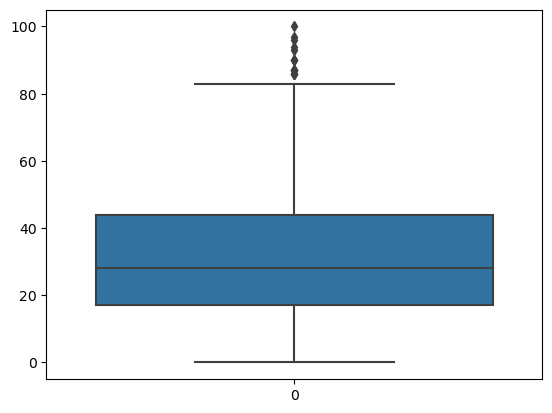

In [19]:
sns.boxplot(df['placement_exam_marks'])

In [20]:
percentile25 = df['placement_exam_marks'].quantile(.25)
percentile75 = df['placement_exam_marks'].quantile(.75)
percentile25,percentile75

(17.0, 44.0)

In [21]:
IQR = percentile75 - percentile25
IQR

27.0

In [22]:
lower_limit = percentile25 - 1.5 * IQR
upper_limit = percentile75 + 1.5 * IQR
upper_limit,lower_limit

(84.5, -23.5)

In [23]:
 
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed,cgpa_z
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


## Trimming

In [24]:
df3 = df[df['placement_exam_marks'] < upper_limit]
df3.shape

(985, 4)

In [25]:
df3['placement_exam_marks']

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 985, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


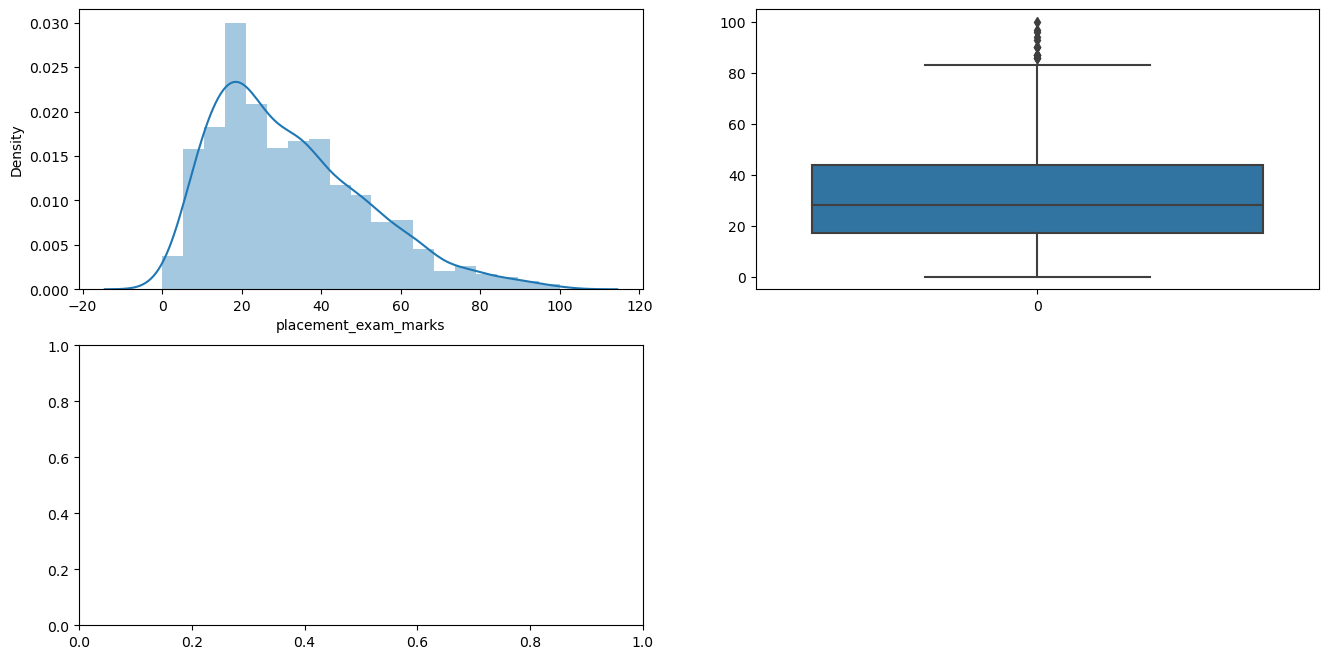

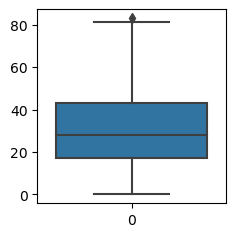

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.displot(df3['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df3['placement_exam_marks'])

plt.show()

## Capping

In [27]:
df5 = df.copy()
df5['placement_exam_marks'] = np.where(df5['placement_exam_marks'] > upper_limit,
                                      upper_limit,
                                      np.where(df5['placement_exam_marks'] < lower_limit,
                                              lower_limit,
                                              df5['placement_exam_marks']))

In [28]:
df5.describe()

,cgpa,placement_exam_marks,placed,cgpa_z
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961240,32.136500,0.489000,-1.465494e-16
std,0.615898,18.865419,0.500129,1.000000e+00
min,4.890000,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,9.120000,84.500000,1.000000,3.505062e+00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


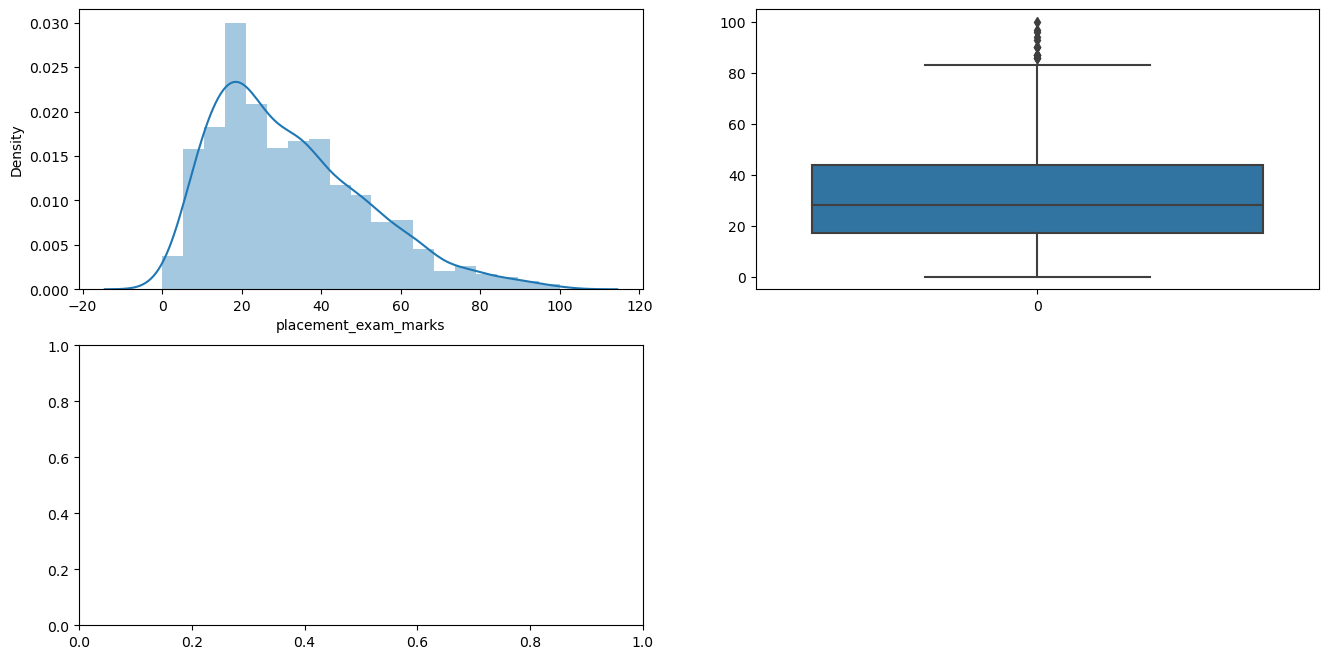

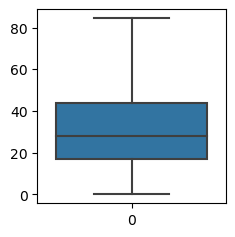

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2,2,3)
sns.displot(df5['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(df5['placement_exam_marks'])

plt.show()

# Winsorization Technique

In [30]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [31]:
percentile99 = df['cgpa'].quantile(.95)
percentile01 = df['cgpa'].quantile(.05)
IQR1 = percentile99 - percentile01
percentile99 , percentile01 , IQR1

(7.9505, 5.97, 1.9805000000000001)

In [32]:
lower_limit = percentile01 - 1.5 * IQR1
upper_limit = percentile99 + 1.5 * IQR1
upper_limit,lower_limit

(10.92125, 2.9992499999999995)

<h4>Here we cannot apply Winsorization technique </h4> 